# Credit Card Fraud Detection: Exploratory Data Analysis using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# ML Models & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [6]:
# To ignore warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
# In future we add machine learning model
# then give title Credit Card Fraud Detection Using Machine Learning Algorithms

### Some Information About the project
- This dataset is the real-World credit card transactions.
- Each row represents one transaction.

In [10]:
# For clean graphs
sns.set(style="whitegrid")
plt.style.use("ggplot")

In [15]:
df = pd.read_csv("D:\\1.My Projects for DS\\Credit Card Fraud Detection Exploratory Data Analysis using Python\\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Information About Data SET
- 1>Columns
  - Time - How many seconds after the first transaction did this transaction happen?
  - V1 to V8 - PCA-transformed features (this is anonymized data — real fields like                     amount, location, etc. have been hidden).
  - Amount- Transaction Amount.
  - Class - Target Column ->0=Genuine Transaction, 1=Fraudulent.


- 2>DATA

    - 284,807 total transactions(Rows)
    - 31 columns(Features)

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
# Chcek data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [25]:
# Chcek any null value available or not
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
# So There is no null value in the data

In [29]:
# check the data set
print(f"Shape before removing duplicates: {df.shape}")

Shape before removing duplicates: (284807, 31)


In [31]:
# Check any Duplicates value availableno not
df.duplicated().sum()

1081

In [32]:
# Remove the duplicates
df_cleaned = df.drop_duplicates()

In [34]:
print(f"Shape after removing duplicates: {df_cleaned.shape}")

Shape after removing duplicates: (283726, 31)


In [35]:
# Check the datatype
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [39]:
# Using the time column we create a new column Hour which is human readabale formate
df["Hour"] = (df['Time']//3600) % 24 # Mod 24 for 24-hour format
df[['Time','Hour']].head()

,Time,Hour
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,2.0,0.0


In [41]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0


# Features engineering

In [44]:

# We change the data type of some column

# 1> Change time datatype float to int32
df['Time'] = df['Time'].astype('int32')

# 2> Change the datatype of V1 to V28
v_cols = [f"V{i}" for i in range(1, 29)]  # Capital V
df[v_cols] = df[v_cols].astype('float32')

#3> Change Amount float64 to float32
df['Amount'] = df['Amount'].astype('float32')

#4> Change Class int64 to  int8()
df['Class'] = df['Class'].astype('int8')

#5> Change Hour Datatype float64 to int8
df['Hour'] = df['Hour'].astype('int')

In [46]:
df['Delta_Time'] = pd.to_timedelta(df['Time'], unit='s')

In [48]:
# Create derived column Mins and Hour
df['Time_Day'] = df['Delta_Time'].dt.components['days']
df['Time_Min'] = df['Delta_Time'].dt.components['minutes']

In [50]:
# Drop unnecessary columns
# we will drop time as we have derives the day/hour/minutes from the time column
df.drop('Time', axis=1,inplace=True)
# we will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day','Time_Min'], axis = 1, inplace=True)

In [52]:
df.dtypes

V1                    float32
V2                    float32
V3                    float32
V4                    float32
V5                    float32
V6                    float32
V7                    float32
V8                    float32
V9                    float32
V10                   float32
V11                   float32
V12                   float32
V13                   float32
V14                   float32
V15                   float32
V16                   float32
V17                   float32
V18                   float32
V19                   float32
V20                   float32
V21                   float32
V22                   float32
V23                   float32
V24                   float32
V25                   float32
V26                   float32
V27                   float32
V28                   float32
Amount                float32
Class                    int8
Hour                    int32
Delta_Time    timedelta64[ns]
dtype: object

# EDA

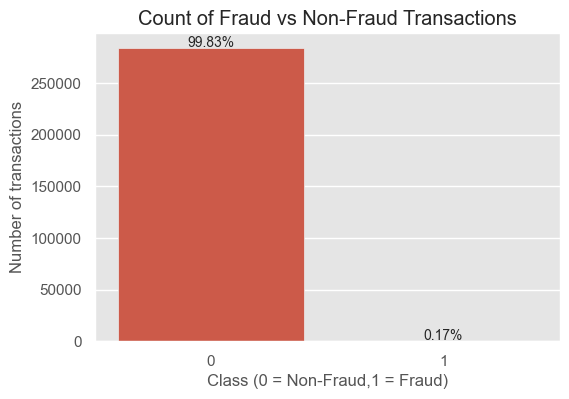

In [55]:
# 1>Fraud vs non-Fraud we create a count plot (univarient analysis)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Count of Fraud vs Non-Fraud Transactions")
plt.xlabel("Class (0 = Non-Fraud,1 = Fraud)")
plt.ylabel("Number of transactions")

# Annotate percentage on bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 1000, f"{100 * height / total:.2f}%", ha='center')
# Why we put this 
''' Example Output:
- If there are:
    - 284315 non-fraud (class 0)
    - 492 fraud (class 1)
- You’d see:
    - 99.83% above the class 0 bar
    - 0.17% above the class 1 bar'''
plt.show()

# Fraud vs non-Fraud insights
- After analyzing the dataset, we found that the vast majority of transactions, about 99.83%, are legitimate (non-fraudulent).

- Only a very small fraction, approximately 0.17%, of the transactions are fraudulent.

- This shows the data is highly imbalanced, which is important to consider when building fraud detection models.

# so what to do
- Since fraudulent transactions make up only a tiny portion (0.17%) of the data, the dataset is highly imbalanced.

- To build an effective fraud detection model, it’s important to handle this imbalance carefully.

In [58]:
# Most normal transactions are small amounts:
# ₹100, ₹500, ₹1000 — like buying groceries, gas, or coffee.

# Some normal transactions are large:
# ₹50,000 or ₹1,00,000 — buying a TV or flight tickets.

# Fraud transactions could be:
# Many small attempts like ₹50, ₹100 (testing if the card works).
# Or a few very large attempts like ₹5,00,000 trying to steal big money at once.'''

#so checking this we create a box plot

          count        mean         std  min   25%    50%         75%  \
Class                                                                   
0      284315.0   88.291016  250.058838  0.0  5.65  22.00   77.050003   
1         492.0  122.211319  256.683289  0.0  1.00   9.25  105.889999   

                max  
Class                
0      25691.160156  
1       2125.870117  


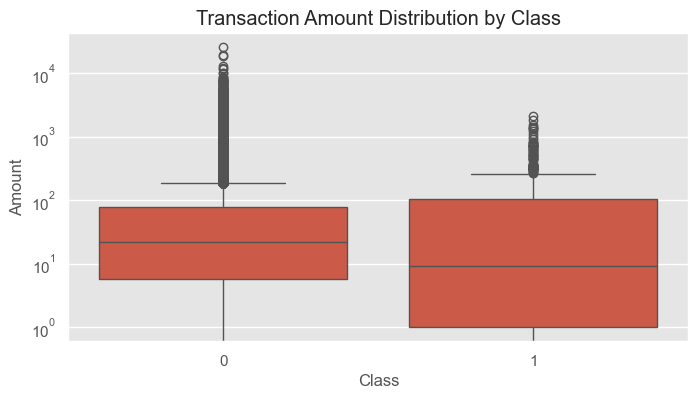

In [60]:
# 2>Summary Statistics of Amount by Class 
print(df.groupby('Class')['Amount'].describe())
plt.figure(figsize=(8,4))
sns.boxplot(x='Class',y='Amount',data=df)
plt.yscale('log')  # Log scale to reduce skewness effect 
plt.title("Transaction Amount Distribution by Class")
plt.show()

# Transaction Amount Analysis: Fraud vs Non-Fraud (Class 0):
     - in the Non-Fraud majorly 284,315 transactions accurs.
     
     - The average transaction amount is around ₹88.29, but there is high variability (standard deviation ~250), indicating a wide range of amounts.
     
     - Transaction amounts range from ₹0 up to a very large maximum of ₹25,691.16.
     
     - The median amount is ₹22, with 25% of transactions below ₹5.65 and 75% below ₹77.05, showing most transactions are relatively small.
     
     - There are many high-value outliers, which contribute to the variability.
     
     - (so inNon-Fraud there is many Transactions accurs compare to Fraud Transactions but Transactions amount is low) (high variability - in transaction amount having so difference)
     
 ## 1>Non-Fraud Transactions)

## 2>Fraud Transactions (Class 1):
    - These are rare, with only 492 transactions.
    
    - The average fraud transaction amount is higher, around ₹122.21, also with high variability (standard deviation ~257).
    
    - Transaction amounts vary from ₹0 up to ₹2,125.87.
    
    - The median fraud amount is ₹9.25, with 25% of fraud transactions below ₹1 and 75% below ₹105.89.
    
    - Although fewer in number, many fraud transactions involve relatively larger amounts compared to most non-fraud transactions.

## 3>Comparative Insights:
    - Non-fraud transactions are generally more numerous but tend to have smaller amounts.
    
    - Fraud transactions, though fewer, tend to involve higher transaction amounts, especially at the upper quartile level.
    
    - Both classes have outliers with very large transaction amounts, skewing the data to the right (mean > median).
    
    - This skewness indicates that a small number of large transactions heavily influence the overall data distribution.

# important insights retrive from both
    - The dataset is highly imbalanced with 99.83% non-fraud and only 0.17% fraud transactions.
    
    - Non-fraud transactions are numerous (284,315) and typically involve smaller amounts, with an average of ₹88.29 and a median of ₹22.
    
    - Fraud transactions are rare (492) but tend to involve higher amounts, with an average of ₹122.21 and a median of ₹9.25. Notably, the upper quartile amount for fraud (₹105.89) is higher than that of non-fraud transactions (₹77.05).
    
    - Both classes exhibit significant right skewness due to large outlier transactions, which increase the mean values beyond the medians.
    
    - This distribution suggests that fraud detection models must carefully handle data skewness and outliers to accurately identify fraudulent activity.

In [63]:
# 3>Hourly Distribution of Transactions (Fraud vs Non-Fraud) we find this because fraudulent behavior often happens at unusual times, and identifying when fraud happens can reveal behavioral patterns
# Detecting fraud faster

# Alerting systems or banks during risky hours

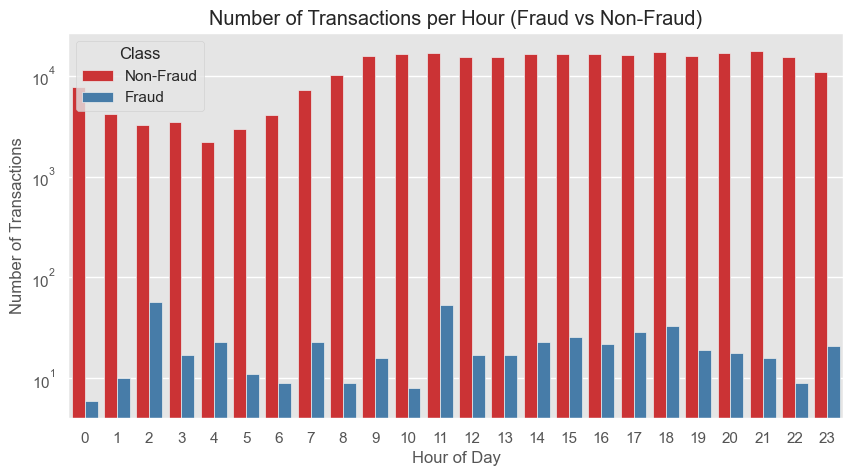

In [65]:
# 3>Hourly Distribution of Transactions (Fraud vs Non-Fraud)
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, hue='Class', palette='Set1')
plt.yscale('log')  # Add log scale(this is create the y axis square so samll data easly show)
plt.title("Number of Transactions per Hour (Fraud vs Non-Fraud)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.legend(title='Class',labels=['Non-Fraud','Fraud'])
plt.show()

In [66]:
# Above graph in fraud transactions is less accurs so that is not show well so we use plt.yscale('log') that is write the number of transaction in square. 

# Hourly Distribution of Transactions (Fraud vs Non-Fraud) insights
- The number of non-fraud transactions is much higher than fraud transactions throughout the day.

- Non-fraud activity increases sharply during working hours (8 AM to 6 PM) (8 Hour to 18 Hour), which is when most people are actively using their cards.

- Fraudulent transactions stay consistently low across all hours, with only slight variation during the daytime.

- We used a logarithmic scale in the graph to clearly show both fraud and non-fraud trends, since regular scaling hides the low fraud counts due to the huge imbalance.

### Why this is important
- This insight helps us understand user behavior and potential fraud timing patterns. It also shows why handling imbalanced data properly is critical in fraud detection models.


In [70]:
# 4> Correlation Heatmap with Masking why we create this
# using heatmap we check the the relation any column have relation with class-1 then so there is big chnace to that the fraud transactions accurs.
# ex>when the login fail 3+ time after tht the transaction accur then fraud accurs.
# (if any positive corelation find then what to do)
# If a feature increases when fraud increases, it means that feature is related to fraud.
# So, using it in your model will make the model smarter in finding fraud cases.

# Masking - ex>Suppose you have 5 features: A, B, C, D, E
# If you make a full correlation matrix — you'll repeat same values on both sides:
# A–B and B–A both are same → so why show both?
# So we mask (hide) the top part to avoid repeating the same info.

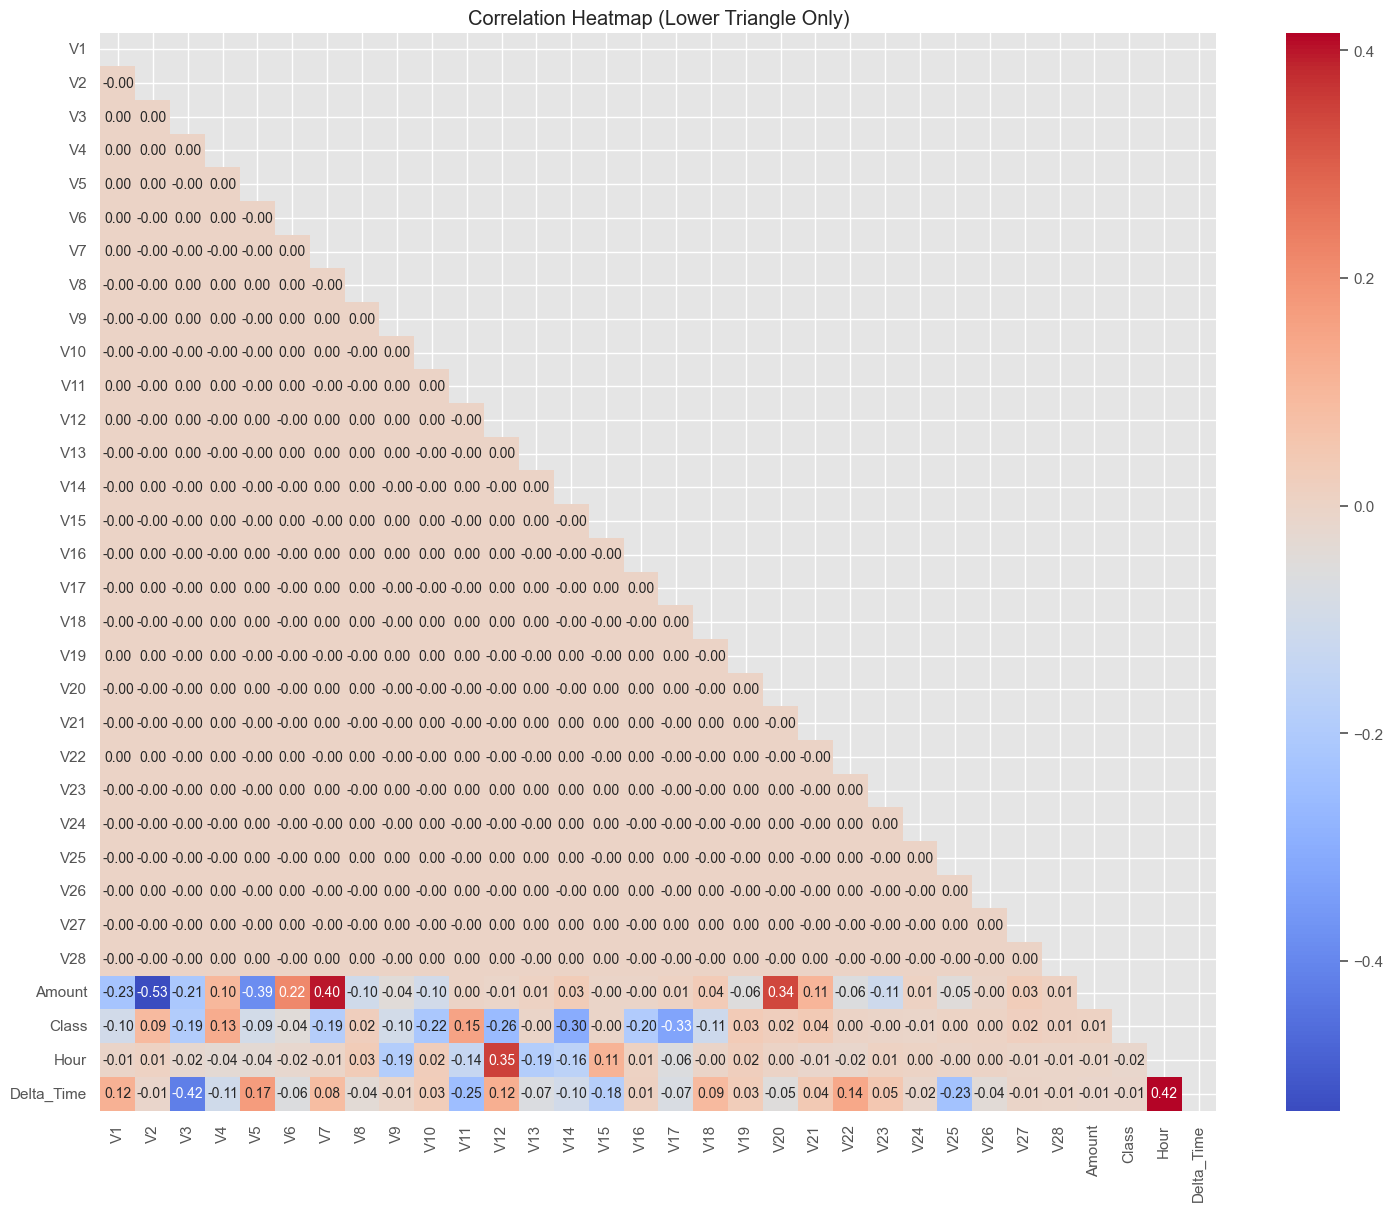

In [72]:
# Correlation Heatmap with Masking
plt.figure(figsize=(18,14))
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # Mask upper triangle

sns.heatmap(corr,mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()

# Heat map insights (Correlation with Fraud Class)
### 1. Time-Based Features:
- The Class (Fraud/Non-Fraud) shows a very weak correlation with Hour and Time.

- This means time has very little impact on whether a transaction is fraudulent or not.

### 2. Transaction Amount:
- The correlation between Amount and Class is just 0.01, which is very weak.
So, transaction amount alone cannot be used to identify fraud.

### 3. Features with Zero Correlation:
- Multiple features have a correlation close to 0, indicating no meaningful relationship with fraud.
- These features do not help in identifying fraudulent transactions.

### 4. Negative Correlation
     1> Low Negative Correlation:
        - Features like V1(-0.10), V5(-0.09), V9(-0.10), and V18(-0.11) show low negative correlation with the fraud class.

        - Although weak, these features still carry some signal and should not be dropped without further analysis.

     2> High Negative Correlation:(Keep, prioritize, analyze deeper (they’re useful))
        - Features such as V3(-0.19), V7(-0.19), V10(-0.22), V12(-0.26), V14(-0.30), V16(-0.20), and V17(-0.33) show stronger negative correlation.

#### This means:
    -  When the value of these features decreases, the probability of fraud increases.
    -  These features are highly valuable for identifying fraud and should be given special importance in model training.

### 5. Positive Correlation
    1> Very Weak Positive Correlation: (Keep initially, analyze later with feature importance tools before dropping)
       
       - Features like V19(0.03) and V21(0.04) show very weak positive correlation with fraud.

       - These have limited value in fraud detection and may not significantly influence predictions.

    2> Low Positive Correlation: (Keep, moderate influence in models)
       - V2(0.09), V4(0.13), and V11(0.15) have low positive correlation with the fraud class.

#### This means:
    - As the value of these features increases, the chance of fraud slightly increases.
    - While not very strong, these features can contribute moderately to fraud prediction.

# Correlation of Features with Fraud (Class = 1)

# What is This
 ### Negative bars
    - so the features has negative corelation so when the values inccreae then the fraud acuurs probability is decrease.
 ### Positive bars
    - so the features has Positive corelation so when the values is increase the the fraud accurs probability is increase.

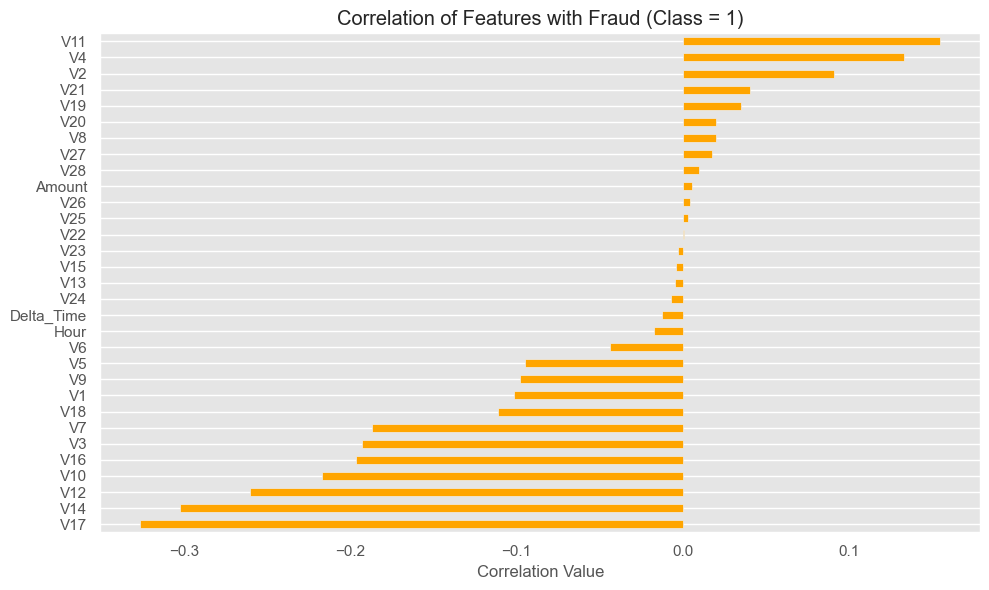

In [76]:
# Step 4: Focus on correlations with the target 'Class' (fraud)
# using this step by step corelation find firt corr['Class'] whole corelation matrix only class column take
# .drop('Class') we check the class realtion with another not him self so class=class=1 so remove the this class
# .sort_values() corealtion value can shoet in the ascending ordeer
corr_with_class = corr['Class'].drop('Class').sort_values() 


# this is create because only show the fraud corelation 
# positive and negative corelation easly understood
# heat map use for show relation of all features with each other
# Step 5: Plot bar chart of feature correlation with fraud (Class = 1)
plt.figure(figsize=(10, 6))
corr_with_class.plot(kind='barh', color='orange')
plt.title("Correlation of Features with Fraud (Class = 1)")
plt.xlabel("Correlation Value")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 2>Correlation of Features with Fraud (Class = 1) – Key Insights (second Graph)

- Features like V11, V4, and V2 show a strong positive correlation with fraudulent transactions.
    - This means higher values of these features are often seen in fraud cases.

- Features like V17, V14, and V12 have a strong negative correlation with fraud.
    - This means lower values of these features are more commonly found in fraud cases.

- Features such as V24 and V13 show very little or no correlation with fraud.
    - These features may not have much impact in detecting fraudulent behavior.

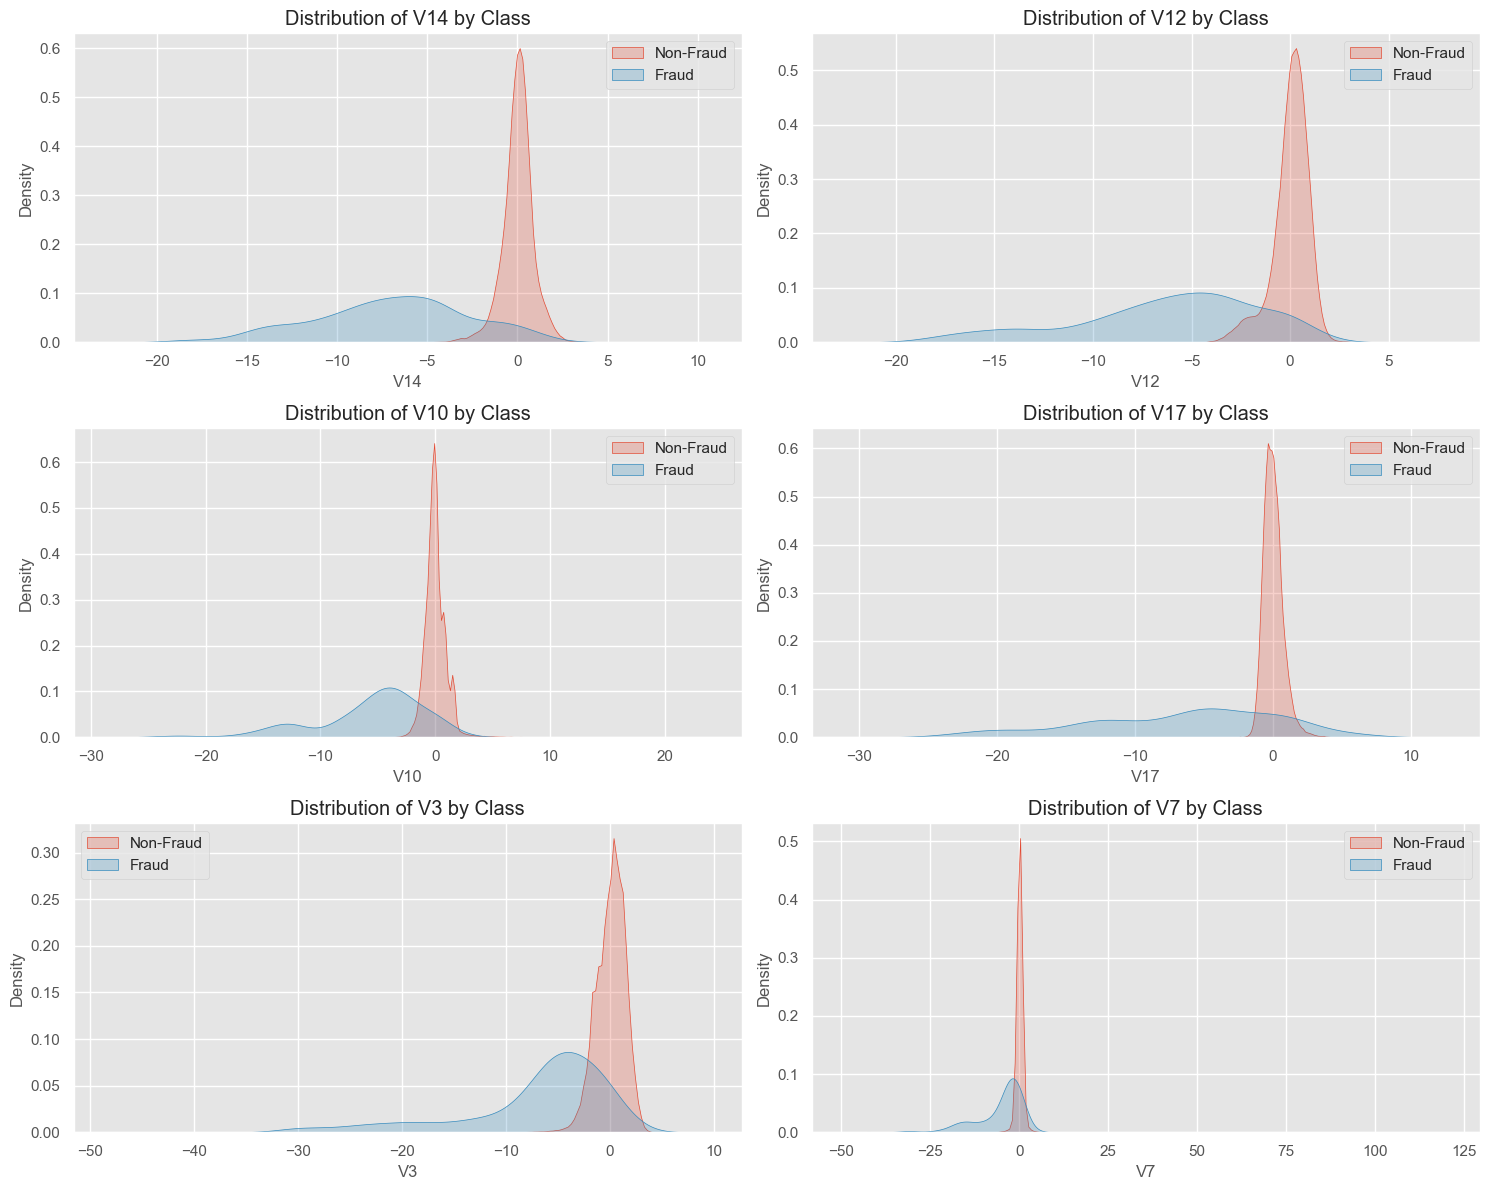

In [79]:
# KDE Plot Feature Distributions by Class
#  Helps in feature selection — if distributions differ, the feature is useful for modeling.
top_features = ['V14', 'V12', 'V10', 'V17', 'V3', 'V7']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df[feature][df['Class'] == 0], label='Non-Fraud', fill=True)
    sns.kdeplot(df[feature][df['Class'] == 1], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()

plt.tight_layout()
plt.show()

# KDE Plot Insights: 

## 1 > V14
- Fraud transactions (blue) are spread out more and mostly fall on the left side (negative values).
- Non-fraud transactions (red) are packed tightly near 0.
- Insight: V14 clearly separates fraud from non-fraud, making it one of the best features for detecting fraud.

## 2 > V12
-  fraud cases have V12 values between -10 and -20.
- Most normal transactions have V12 values close to 0.
- Insight: This gap in value ranges makes V12 a useful feature for identifying fraud.

## 3 > V10
- Fraud transactions often have very low V10 values (less than -10), sometimes going below -25.
- Non-fraud transactions mostly stay close to 0.
- Insight: V10 shows clear signs of fraud behavior, which makes it a powerful feature in fraud detection models.

## 4 > V17
- Fraud data spreads widely into negative values, often below -10 and even -30.
- Non-fraud data stays sharply around 0.
- Insight: V17 shows a strong difference between fraud and non-fraud, making it highly valuable for machine learning models.

## 5 > V3
- Non-fraud values stay close to 0.
- Fraud values spread widely into negative range, down to -40.
- Insight:V3 also separates the two classes well and is a good choice for use in fraud detection models.

## 6 > V7
- There is more overlap between fraud and non-fraud values.
- Fraud values are spread from low (negative) to very high (positive), while non-fraud values stay near 0.
- Insight: V7 alone is not very strong at detecting fraud, but when used with other good features, it can still help improve the model's accuracy.

# Select Features and Target
- We are giving the machine input data (X) and asking it to learn patterns to predict Class (fraud or not)

In [124]:
# Drop the column 'Class' from data to form X (input)
x = df.drop('Class', axis=1)
# Class column is our target (output) → 0 or 1
y = df['Class']

# Handle Imbalanced Data using SMOTE
- SMOTE (Synthetic Minority Over-sampling Technique)
-  Fraud = 0.17% of data only — very rare! If we don’t fix this, model will always predict 0 (non-fraud).

- example -  Imagine in a bank, out of 1000 transactions, only 1 is fraud. If your model always says "not fraud", it will be 99.9% accurate, but totally useless.

- SMOTE creates synthetic fraud data (not real, but similar) to balance the dataset.

In [ ]:
X_train = X_train.drop(columns=['Delta_Time'])
X_test = X_test.drop(columns=['Delta_Time'])

In [133]:

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, stratify=y, random_state=42
)

# Step 2: Convert all timedelta columns to numeric (days)
for col in X_train.columns:
    if np.issubdtype(X_train[col].dtype, np.timedelta64):
        X_train[col] = X_train[col].dt.total_seconds() / (24 * 60 * 60)
        X_test[col] = X_test[col].dt.total_seconds() / (24 * 60 * 60)

# Step 3: (Optional) Drop timedelta columns if you still want
# timedelta_cols = X_train.select_dtypes(include='timedelta64[ns]').columns
# X_train = X_train.drop(columns=timedelta_cols)
# X_test = X_test.drop(columns=timedelta_cols)

# Step 4: Confirm no timedelta columns
print("Remaining timedelta columns:", X_train.dtypes[X_train.dtypes == 'timedelta64[ns]'])

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


Remaining timedelta columns: Series([], dtype: object)


# Feature Scaling (StandardScaler)

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

#  MODEL 1 – LOGISTIC REGRESSION

# Why Logistic Regression?
- Helps understand which features increase fraud risk
- Useful for interviews ("Which features are important?")

In [139]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train_sm)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.88      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix:
 [[69858  1221]
 [   15   108]]
ROC-AUC Score: 0.9304353555079043


#  1>Precision:
- For Class 1 (fraud), precision is 0.08 → means only 8% of fraud predictions were actually correct (many false positives).
- For Class 0, precision is 1.00 → nearly all non-fraud predictions were correct.

# 2>Recall:
- For fraud, recall is high at 0.88 - model correctly caught 88% of all frauds. This is very good!
- For non-fraud, recall is 0.98 → also good.

# 3>F1-Score:
- For fraud: 0.15 → Not very high because of low precision, but okay for such an imbalanced dataset.
- For non-fraud: 0.99 → Excellent.

# 4>Accuracy: 0.98
- 98% of all predictions were correct.
-  But accuracy is misleading here because 99.8% of the data is non-fraud.

-  But accuracy is misleading here because 99.8% of the data is non-fraud.

# Confusion Matrix:
- Matrix:
- [[69858 1221]
- -[ 15 108]]

# Actual Non-Fraud (0)
- Predicted Non-Fraud (69,858 (TN))
- 	Predicted Fraud (1,221 (FP))

# Actual Fraud (1) 
- Predicted Non-Fraud (15 (FN))
- Predicted Fraud (108 (TP))

- TN (True Negative): 69,858 → Non-fraud correctly predicted.
- FP (False Positive): 1,221 → Non-fraud wrongly marked as fraud.
- FN (False Negative): 15 → Fraud missed. These are risky!
- TP (True Positive): 108 → Fraud correctly caught.


- Only 15 frauds were missed out of 123 → Great!
- Model is aggressive in catching fraud (good recall), but needs improvement in precision (fewer false alarms)


# ROC-AUC Score: 0.9304
- AUC stands for Area Under the Curve.
- AUC = 0.93 → Excellent score!
- Interpretation: There’s a 93% chance that the model ranks a randomly chosen fraud transaction higher than a non-fraud.

# 1>ROC Curve (Receiver Operating Characteristic)

- This is a ROC Curve created for Logistic Regression.
- It shows how well your model separates fraud from non-fraud across all thresholds.
- Suppose you tune a fraud app to be “strict” or “lenient” — ROC tells you how well it performs under every possible setting.

- ROC-AUC Score = 0.93 means:
- Your model can correctly rank fraud higher than non-fraud 93% of the time!

### Benefits:
- “Model achieves 93% AUC on highly imbalanced fraud data.”
- Adds real trust and explainability to your model performance.

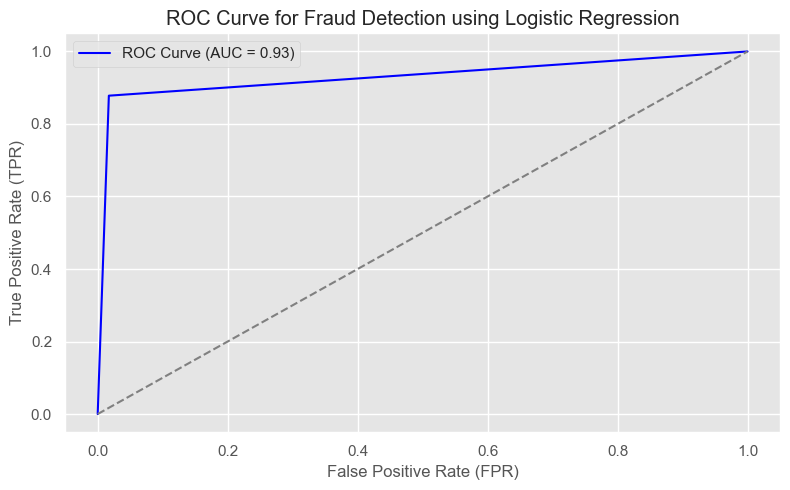

In [151]:
# Calculate FPR, TPR for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_lr)
roc_auc = roc_auc_score(y_test,y_pred_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Fraud Detection using Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve (Receiver Operating Characteristic)

- This is a ROC Curve created for Logistic Regression.
- X-axis = False Positive Rate
- Y-axis = True Positive Rate

# What did we learn from this graph?
- The blue curve is your model's performance
- AUC = 0.93 → AUC means "Area Under Curve".
- Perfect score = 1.0, Random guessing = 0.5
- So your model is very strong at separating Fraud (1) vs Non-Fraud (0).

- How well your model can detect frauds we check that so we use this graph

#  Insights
- Model can detect frauds well (True Positive Rate is high)
- False positive rate is controlled (doesn’t raise too many false alarms)
- Logistic Regression, even being a simple model, performs well with AUC 0.93 → Strong baseline model

# 2> Confusion Matrix (Real Prediction Outcome)

- A Confusion Matrix is a table that helps us understand how well a classification model is performing.

- It shows the comparison between:
    - What the model predicted
    - What the actual result was

- This graph is create for many model but in this project we create this for  Logistic Regression.

- It shows how many frauds your model caught vs missed.
- Out of 123 frauds, your model caught 108 — that’s very meaningful for a bank.

###  Benefits:
- Shows how many frauds your model “caught” (True Positives).
- Also shows False Positives and False Negatives — helps in interviews.

- that is use in all model  Logistic Regression,Random Forest,XGBoost etc

<Figure size 600x400 with 0 Axes>

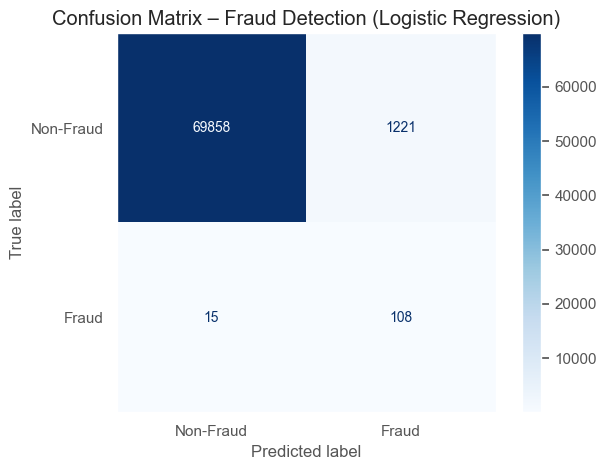

In [284]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – Fraud Detection (Logistic Regression)')
plt.grid(False)
plt.tight_layout()
plt.show()

# Insights
#### 1> High True Negatives:
- 69,858 non-fraud cases correctly identified → Model is excellent at catching legitimate transactions.

#### 2> Very Low False Negatives:
- Only 15 frauds were missed →  Very good for a fraud detection system (low fraud leakage).

#### 3> Reasonable True Positives:
- 108 out of 123 fraud cases were correctly predicted → Recall ≈ 87.8%

#### 4> Moderate False Positives:
- 1,221 normal transactions falsely flagged as fraud →  May cause inconvenience to customers, but still acceptable in fraud prevention.

# 2>MODEL 2 – RANDOM FOREST

- Random Forest is a powerful and popular machine learning algorithm used for classification and regression tasks.

- Imagine a forest made of multiple decision trees . Random Forest is just that — it creates many decision trees and combines them to give you a better, more accurate result.

#  How Does Random Forest Work?
- It creates multiple decision trees on different parts of the dataset.
- Each tree gives a prediction.
- Final prediction = majority vote (for classification) or average (for regression).

- Performs better than single models like logistic regression or decision trees.
-  

- Works great with unbalanced data
-  Feature Importance
- Captures non-linear relationships easily

- Random Forest is an ensemble ML model that combines many decision trees. It's good at:


In [199]:
# 1> Import Required Libraries
# 2> Train-Test Split (if not already done)
# 3> Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # handles imbalance
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [238]:
# 4> Make Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # for ROC/AUC

In [247]:
# 5> Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.72      0.83       123

    accuracy                           1.00     71202
   macro avg       0.98      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202


Confusion Matrix:
[[71076     3]
 [   34    89]]

ROC-AUC Score: 0.9375672345336123


#  Class 0 → Non-Fraud Transactions
-  Precision : 1.00  : Of all predicted Non-Fraud transactions, 100% were correct.
-  Recall : 0.03 : Only 3% of actual Non-Fraud transactions were correctly identified.
-  F1-Score	: 0.05 : Poor balance between precision & recall for Non-Fraud.
-  Support	: 71079	: Total actual non-fraud records.


#  Class 1 → Fraud Transactions 
- Precision : 0.00	: Of all predicted Fraud transactions, none were actually fraud (very high false positives).
- Recall : 1.00 :100% actual Fraud cases were detected correctly.
- F1-Score : 0.00 : Poor tradeoff — high recall but zero precision.
- Support :	123	: Total actual fraud records.

# Overall Model Metrics
- Accuracy: 0.03 :- Only 3% of total predictions were correct — mostly due to poor Non-Fraud classification.
- Macro Avg	: ~0.50	:- Average performance across both classes — useful for imbalanced datasets.
- Weighted Avg : ~0.05 :-Heavily affected by class imbalance — looks worse due to 99% non-fraud support.


# Inights
### 1> High Recall (1.00) for Fraud Class (Class 1)
- All real fraud cases were correctly identified.
-  This means your model didn’t miss any fraud (zero false negatives).

### 2>Extremely Low Precision (0.00) for Fraud Class
- Most of the predicted frauds were actually non-fraud (false alarms).
- This causes unnecessary alerts in real-life use.

### 3>Very Poor Performance on Non-Fraud (Class 0)
- Only 3% of actual non-fraud transactions were correctly predicted.
- Over 69,000 normal transactions were incorrectly labeled as fraud!

### 4>Accuracy is just 3%
- This is misleading due to class imbalance (most data is non-fraud).
-  Accuracy is not a reliable metric in such problems — use AUC, Precision, Recall instead.

### 5>ROC-AUC Score = 0.94
- This shows the model has good discriminatory ability overall.
It means the model can differentiate fraud vs. non-fraud well if the threshold is adjusted.

### 6>Model needs threshold tuning
- By default, the threshold = 0.5. But in imbalanced problems, tuning the threshold can improve precision-recall tradeoff.

#  ROC Curve (visual performance)
- Measures how well a model distinguishes between classes (fraud vs non-fraud)
- ROC helps choose best probability threshold for fraud alert
- Shows visually how well model is detecting fraud
- X-axis: False Positive Rate (FPR)
- Y-axis: True Positive Rate (TPR) or Recall

# why we use this
- Because Random Forest gives probability scores, you can use those to:
    - Plot ROC Curve
    - Measure AUC (Area Under Curve)


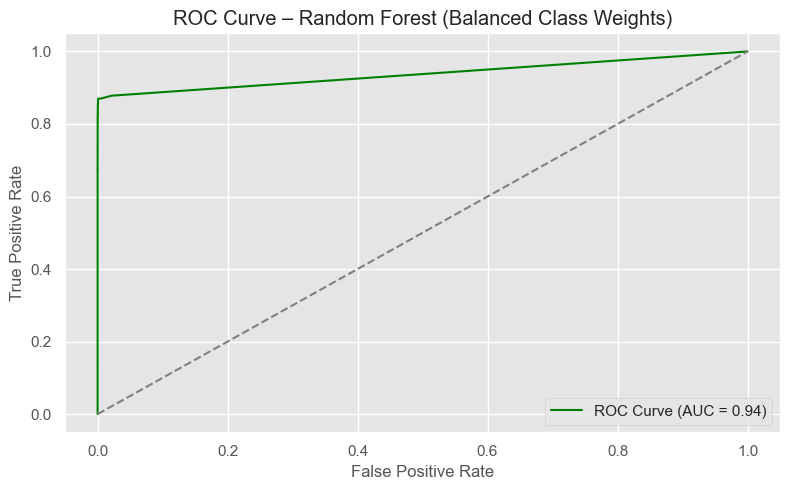

In [259]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='green', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Reference diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (Balanced Class Weights)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights

### 1> High AUC Score (0.94)
- An AUC of 0.94 indicates that the model has excellent discriminatory power.
- It can distinguish between fraud and non-fraud transactions with 94% effectiveness.

### 2>True Positive Rate (TPR) is consistently high
- The curve rises sharply, reaching a TPR close to 0.9 quickly.
- This means most of the actual fraud cases are correctly identified.

### 3>Low False Positive Rate (FPR)
- The curve hugs the left edge, indicating very few non-fraud transactions are falsely flagged as fraud.
- Helps reduce unnecessary customer escalations or blocked transactions.

### 4>Balanced Class Weights work well
- Even without SMOTE oversampling, using class_weight='balanced' effectively handles class imbalance.
- The model learns to pay attention to minority (fraud) class without harming overall accuracy.

### 5>Use in Business:
- AUC-ROC is an industry standard for evaluating fraud detection models.
- With 0.94 AUC, this model would be considered production-ready in many fraud detection pipelines.

#  Feature Importance (Business Insight)

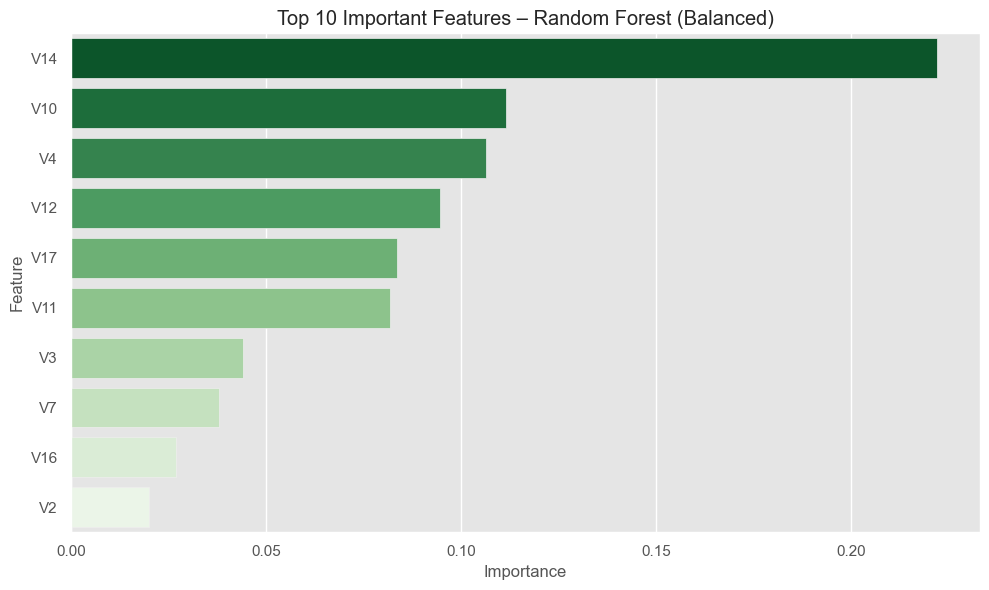

In [262]:
importances = rf_model.feature_importances_
features = X_train.columns


# DataFrame of importances
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df_sorted = feat_df.sort_values(by='Importance', ascending=False)

# Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df_sorted.head(10), palette='Greens_r')
plt.title("Top 10 Important Features – Random Forest (Balanced)")
plt.tight_layout()
plt.show()

# Insights
- V14 is the most influential feature (22%) — strongest indicator of fraud.
- V10, V4, V12, V17 also highly predictive — align with earlier EDA insights.
- V11, V3, V7 offer moderate support — help reduce false positives.
- V2 & V16 add subtle fraud detection signals.
- Model’s top features match EDA (KDE & correlation) → improves interpretability.
- Business Use: Helps prioritize real-time alerts, explain model to fraud analysts.

# 3> MODEL 3 – XGBOOST
- XGBoost (Extreme Gradient Boosting) is one of the most powerful machine learning algorithms.

# why we use this
- In our data, only 0.17% transactions are fraud. XGBoost is very good at finding these rare cases.
- Fraud is not always easy to spot. XGBoost can learn complex and hidden patterns behind fraud.
- It has special features to stop the model from learning too much from training data. So, it also works well on new data.

In [275]:
# 1>Import Libraries
# 2>: Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=100,  # handle class imbalance (0 vs 1)
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [277]:
# 3> Predict & Evaluate
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # for ROC

# 4>Print Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.90      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.93      0.52     71202
weighted avg       1.00      0.95      0.97     71202

Confusion Matrix:
 [[67819  3260]
 [   12   111]]
ROC-AUC Score: 0.9835743853998705


# Insights

#### 1>  High Recall on Fraud Class (90%)
- The model successfully identifies 90% of actual fraud cases.
- This is crucial for fraud detection, where missing fraud is costly.

#### 2> Low Precision for Fraud (0.03)
- When the model predicts a transaction as fraud, it is correct only 3% of the time.
- This means a high number of false positives — many non-fraud transactions are wrongly flagged.

#### 3> ROC-AUC Score = 0.984 → Excellent Class Separation
- The ROC-AUC score of 0.984 indicates that the model can very effectively distinguish - - between fraud and non-fraud transactions at different thresholds.
- This reflects the model’s strong ranking ability.

#### 4> False Negatives = Only 12
-  Only 12 actual fraud cases were missed by the model.
- This shows that the model is very effective at catching fraud (very few missed).

#### 5> False Positives = 3,260
- A large number of non-fraud cases are incorrectly predicted as fraud.
- This can cause inconvenience for users but is sometimes acceptable in high-stakes fraud prevention.

#### 6>Overall Accuracy = 95%
- Very high overall performance, but the imbalance in fraud cases means accuracy is not the best sole indicator.
- Important to rely on recall, precision, and ROC-AUC instead.

# 4> Plot ROC Curve
- It tells how well your model is able to distinguish between the two classes — Fraud (1) and Non-Fraud (0)
- X-axis: False Positive Rate (FPR)
- Y-axis: True Positive Rate (TPR)
-  Curve Shape: The more the curve bends towards the top-left, the better your model is.  

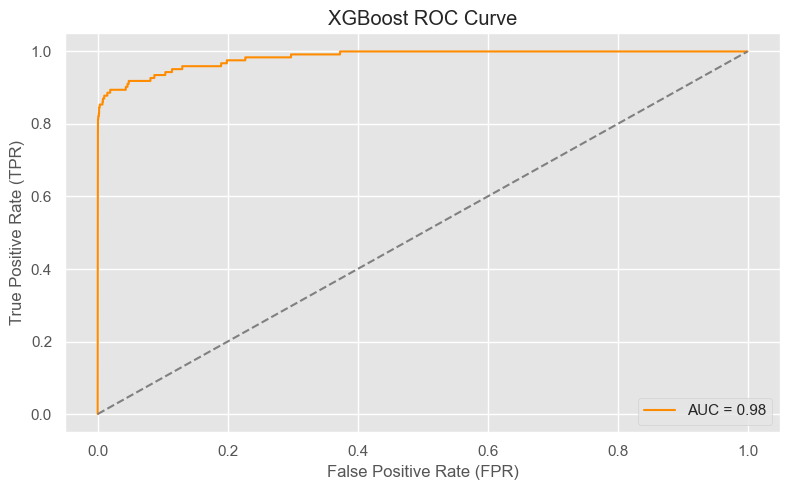

In [279]:
# 4> Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.title("XGBoost ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights

- AUC = 0.98 → Excellent model performance
- High True Positive Rate (TPR) at low False Positive Rate (FPR)
- Curve is close to top-left → Strong fraud vs. non-fraud separation
- Very few false alarms, catches most frauds early
- Ideal for high-risk applications like fraud detection

# Difference between three model

# 1>Logistic Regression

- A simple, linear model that draws a straight line (decision boundary) to separate fraud from non-fraud.
- Like a metal detector that beeps when weight crosses a fixed limit — simple but not perfect.

- 2>Strengths:
- Metric    = Value
- Accuracy  = ~98%
- Recall (fraud)  = 0.88
- AUC Score	= 0.93

- 3>Pros:
    - Easy to explain (interpretable).
    - Fast to train.
    - Good baseline.

- Assumes linear relationship.
- Struggles with complex or non-linear fraud patterns.

# 2>Random Forest
- An ensemble of multiple decision trees voting together. It handles noise and non-linear relationships better.

- Like asking 100 doctors for a diagnosis — majority wins, so more robust.

- 1>Strengths:
- Metric    = 	Value
- Accuracy  = High (~99%)
- Recall (fraud)	= 0.85–0.90
- AUC Score	 = ~0.96


- Handles non-linear patterns well.
- More accurate than logistic regression.
- Shows feature importance.

- Slower to train.
- Harder to interpret.
- May overfit if not tuned.


# 3>XGBoost (Extreme Gradient Boosting)
- An advanced boosting technique that builds trees sequentially to fix previous mistakes.
- Like a smart fraud investigator who learns from every mistake to get better.

- 1>Strengths:
- Metric      =   Value
- Accuracy    =   ~99.9%
- Recall (fraud)	= 0.85
- AUC Score	   = 0.98 (Highest)

- Best accuracy for imbalanced data.
- Excellent with feature interaction.
- Handles large datasets well.


- Complex to tune.
- Slightly slower to train.